In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd
import time

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
import sys
sys.path.append('../../../')

from dataset_loader import DatasetLoader
from sklearn_models import BestSKLearnModel
import tensorflow as tf

C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Using Hamming window function ##

In [3]:
loader = DatasetLoader(preprocess_type='fft', window='hamming', dataset_starts_at_label=1)
dataset = loader.load_dataset(file='samples_nylonGuitar_1024_Mm7_R03.csv', csv=True)

C:\Users\Denis\Dropbox\Github_Projects\TCC\TCC_app\server_Universal_Tuner\api\ML_models/dataset/
0 processed rows
1000 processed rows
2000 processed rows
3000 processed rows
4000 processed rows
5000 processed rows
6000 processed rows
7000 processed rows
8000 processed rows
9000 processed rows
10000 processed rows
11000 processed rows
12000 processed rows
13000 processed rows
14000 processed rows
This loading/preprocessing took 199.19 seconds


In [4]:
print(dataset.y);print(dataset.y.shape)
n_each_k = np.zeros(48)
for k in range(48):
    for m in dataset.y:
        if m == k:
            n_each_k[k] += 1
for i, n_recordings in enumerate(n_each_k):
    print("Class", i,":", n_recordings)

total = 0
for item in n_each_k:
    total = total + item

mean_classes = total/48
print("Average of recordings per class:", mean_classes) #media de gravacoes por classe

[ 38.  10.  20. ...,  28.  12.  19.]
(14377,)
Class 0 : 245.0
Class 1 : 470.0
Class 2 : 335.0
Class 3 : 360.0
Class 4 : 201.0
Class 5 : 256.0
Class 6 : 275.0
Class 7 : 225.0
Class 8 : 482.0
Class 9 : 437.0
Class 10 : 393.0
Class 11 : 304.0
Class 12 : 206.0
Class 13 : 159.0
Class 14 : 267.0
Class 15 : 262.0
Class 16 : 583.0
Class 17 : 551.0
Class 18 : 581.0
Class 19 : 538.0
Class 20 : 314.0
Class 21 : 213.0
Class 22 : 156.0
Class 23 : 235.0
Class 24 : 302.0
Class 25 : 285.0
Class 26 : 266.0
Class 27 : 168.0
Class 28 : 492.0
Class 29 : 257.0
Class 30 : 322.0
Class 31 : 162.0
Class 32 : 159.0
Class 33 : 176.0
Class 34 : 288.0
Class 35 : 274.0
Class 36 : 408.0
Class 37 : 345.0
Class 38 : 323.0
Class 39 : 251.0
Class 40 : 137.0
Class 41 : 183.0
Class 42 : 127.0
Class 43 : 215.0
Class 44 : 273.0
Class 45 : 425.0
Class 46 : 240.0
Class 47 : 251.0
Average of recordings per class: 299.520833333


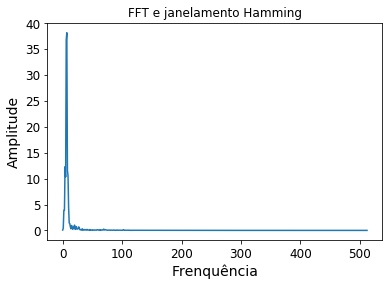

In [5]:
plt.plot(dataset.X[0])
plt.xlabel('Frenquência')
plt.ylabel('Amplitude')
plt.title('FFT e janelamento Hamming')
plt.show()

In [6]:
model = BestSKLearnModel()

time_initial = time.time()
model.fit(X_train=dataset.X_train, y_train=dataset.y_train)
time_final = time.time()

print ("This training took %.2f seconds" % (time_final - time_initial))

C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Training model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) using cross validation with 5 folds
{'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), 'accuracy': 0.85834497766749485}
Training model OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1) using cross validation with 5 folds
{'model': OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_

In [7]:
model.accuracy_score(dataset.X_test_valid, dataset.y_test_valid)

0.87169680111265646

## Using Hanning window function ##

In [9]:
loader = DatasetLoader(preprocess_type='fft', window='hanning', dataset_starts_at_label=1)
dataset2 = loader.load_dataset(file='samples_nylonGuitar_1024_Mm7_R03.csv', csv=True)

C:\Users\Denis\Dropbox\Github_Projects\TCC\TCC_app\server_Universal_Tuner\api\ML_models/dataset/
0 processed rows
1000 processed rows
2000 processed rows
3000 processed rows
4000 processed rows
5000 processed rows
6000 processed rows
7000 processed rows
8000 processed rows
9000 processed rows
10000 processed rows
11000 processed rows
12000 processed rows
13000 processed rows
14000 processed rows
This loading/preprocessing took 200.30 seconds


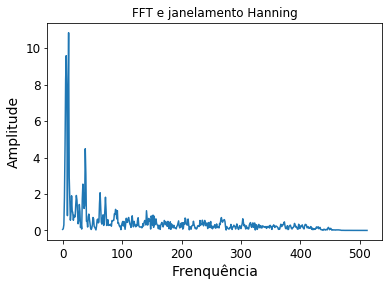

In [10]:
plt.plot(dataset2.X[0])
plt.xlabel('Frenquência')
plt.ylabel('Amplitude')
plt.title('FFT e janelamento Hanning')
plt.show()

In [11]:
model2 = BestSKLearnModel()

time_initial = time.time()
model2.fit(X_train=dataset2.X_train, y_train=dataset2.y_train)
time_final = time.time()

print ("This training took %.2f seconds" % (time_final - time_initial))

Training model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) using cross validation with 5 folds


C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


{'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), 'accuracy': 0.83981377609095775}
Training model OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1) using cross validation with 5 folds
{'model': OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1), 'accuracy': 0.76941871746993296}
Training model MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True

In [12]:
model2.accuracy_score(dataset2.X_test_valid, dataset2.y_test_valid)

0.85222531293463144

## Using Blackman window function ##

In [13]:
loader = DatasetLoader(preprocess_type='fft', window='blackman', dataset_starts_at_label=1)
dataset3 = loader.load_dataset(file='samples_nylonGuitar_1024_Mm7_R03.csv', csv=True)

C:\Users\Denis\Dropbox\Github_Projects\TCC\TCC_app\server_Universal_Tuner\api\ML_models/dataset/
0 processed rows
1000 processed rows
2000 processed rows
3000 processed rows
4000 processed rows
5000 processed rows
6000 processed rows
7000 processed rows
8000 processed rows
9000 processed rows
10000 processed rows
11000 processed rows
12000 processed rows
13000 processed rows
14000 processed rows
This loading/preprocessing took 204.53 seconds


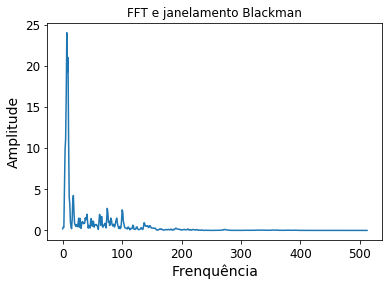

In [14]:
plt.plot(dataset3.X[0])
plt.xlabel('Frenquência')
plt.ylabel('Amplitude')
plt.title('FFT e janelamento Blackman')
plt.show()

In [15]:
model3 = BestSKLearnModel()

time_initial = time.time()
model3.fit(X_train=dataset3.X_train, y_train=dataset3.y_train)
time_final = time.time()

print ("This training took %.2f seconds" % (time_final - time_initial))

Training model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) using cross validation with 5 folds


C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


{'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), 'accuracy': 0.80849350573300938}
Training model OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1) using cross validation with 5 folds
{'model': OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1), 'accuracy': 0.73929890523497621}
Training model MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True

In [16]:
model3.accuracy_score(dataset3.X_test_valid, dataset3.y_test_valid)

0.82406119610570239

In [17]:
print(dataset.X_train.shape)

(11501, 513)
